In [2]:
import pandas as pd
import matplotlib.pyplot as plt

fatality_rate = pd.DataFrame({'Confirmed':[80552, 6284, 3858, 3513, 696, 545, 423, 364], 'Death':[3042, 40, 148, 108, 6, 0, 7,  6]}) #3.67
fatality_rate = fatality_rate.rename(index={0:"China",1:"Korea", 2:"Italia", 3:"Iran", 4: "JPN_Cruise", 5:  " Germany", 6: "France", 7:"Japan" })
fatality_rate['fatality'] = fatality_rate['Death']  /fatality_rate['Confirmed'] *100
fatality_rate

,Confirmed,Death,fatality
China,80552,3042,3.776443
Korea,6284,40,0.636537
Italia,3858,148,3.836185
Iran,3513,108,3.074295
JPN_Cruise,696,6,0.862069
Germany,545,0,0.000000
France,423,7,1.654846
Japan,364,6,1.648352


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


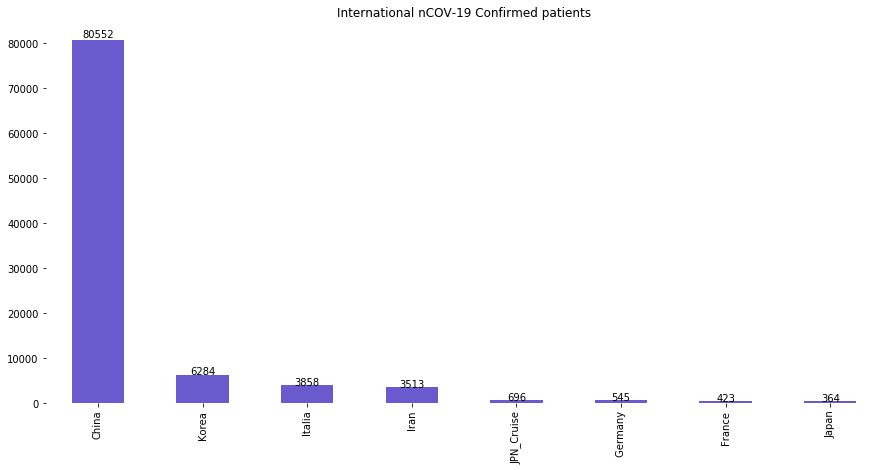

In [2]:
plt.rcParams['figure.figsize']=15,7
ax= fatality_rate['Confirmed'].plot('bar',  title = "International nCOV-19 Confirmed patients", color=['slateblue'])
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  ax.annotate("%.f"%(height), (left+width/2, height*1.01), ha='center')
    
plt.sca(ax)
plt.box(False) 
plt.show()

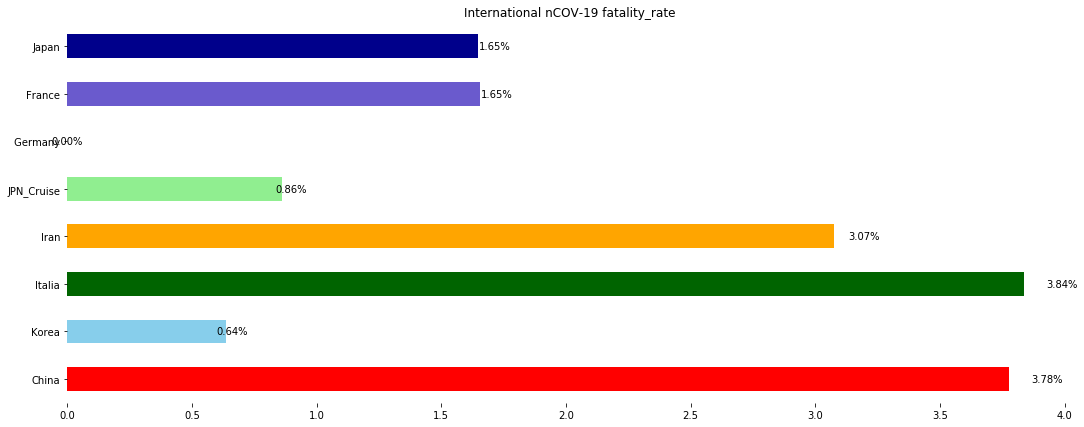

In [3]:
plt.rcParams['figure.figsize']=18,7
ax = fatality_rate['fatality'].plot(kind='barh', stacked=True, title= "International nCOV-19 fatality_rate", rot=0, color=['red', 'skyblue','darkgreen', 'orange','lightgreen','yellow','slateblue', 'darkblue']) 
for p in ax.patches: 
  left, bottom, width, height = p.get_bbox().bounds 
  ax.annotate("%.2f%%"%(width), xy=(left+width*1.04, bottom+height/2), ha='center', va='center') 

plt.sca(ax)
plt.box(False) 
plt.show()


# load Korea nCov-19

In [4]:
import pandas as pd
import numpy as np

df_patient = pd.read_csv('patient.csv')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.offline as py

df_patient

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5762,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5762,5763,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5763,5764,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5764,5765,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated


In [6]:
df_patient.info() # most data have missing value...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766 entries, 0 to 5765
Data columns (total 14 columns):
id                  5766 non-null int64
sex                 421 non-null object
birth_year          408 non-null float64
country             5765 non-null object
region              409 non-null object
group               83 non-null object
infection_reason    146 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      50 non-null float64
confirmed_date      5765 non-null object
released_date       38 non-null object
deceased_date       23 non-null object
state               5765 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 630.8+ KB


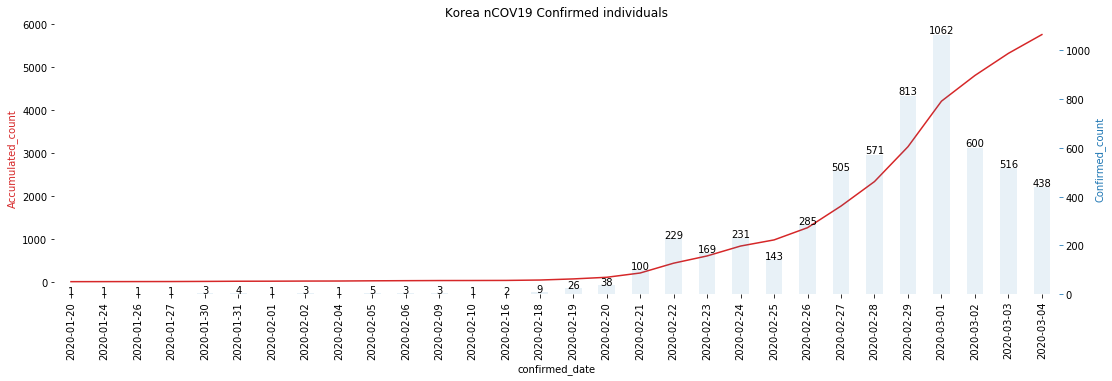

In [7]:
# get daily confirmed count 

daily_count = df_patient.groupby('confirmed_date').id.count()
 
# get accumulated confirmed count

accumulated_count = daily_count.cumsum()

plt.figure(figsize=(18,5))

color = 'tab:red'
ax = accumulated_count.plot(title='Korea nCOV19 Confirmed individuals', rot=90, color=color)
ax.set_ylabel('Accumulated_count', color=color)
plt.box(False)

ax2 = ax.twinx()
color = 'tab:blue'
ax2 = daily_count.plot(kind='bar',color=color, alpha=0.1)
for p in ax2.patches:
  left, bottom, width, height = p.get_bbox().bounds
  ax2.annotate("%.f"%(height), (left+width/2, height*1.01), ha='center') # ha =horizontal align
ax2.set_ylabel('Confirmed_count', color=color)
ax2.tick_params(axis='y', color=color)

plt.box(False)
plt.show()

In [8]:

daily_count = pd.DataFrame(daily_count)
daily_count_data =daily_count.reset_index()
daily_count_data

,confirmed_date,id
0,2020-01-20,1
1,2020-01-24,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,3
5,2020-01-31,4
6,2020-02-01,1
7,2020-02-02,3
8,2020-02-04,1
9,2020-02-05,5


In [9]:
# get accumulated confirmed count
accumulated_count = daily_count.cumsum()
accumulated_count.reset_index(inplace=True)
accumulated_count

,confirmed_date,id
0,2020-01-20,1
1,2020-01-24,2
2,2020-01-26,3
3,2020-01-27,4
4,2020-01-30,7
5,2020-01-31,11
6,2020-02-01,12
7,2020-02-02,15
8,2020-02-04,16
9,2020-02-05,21


In [10]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=daily_count_data.confirmed_date, y=daily_count.id,
        name='nCOV-19 in Korea'))
# Add figure title
fig.update_layout(title_text="daily Confirmed_patient of nCOV-19 in Korea")

# Set x-axis title
fig.update_xaxes(title_text="2020 01 ~03")

In [11]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=accumulated_count.confirmed_date, y=accumulated_count.id, 
               name='nCOV-19 in Korea'))

# Add figure title
fig.update_layout(title_text="Accumulated Confirmed_patient of nCOV-19 in Korea")

# Set x-axis title
fig.update_xaxes(title_text="2020 01 ~03")

In [12]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])


# Add traces
fig.add_trace(
    go.Scatter(x=daily_count_data.confirmed_date, y=daily_count.id,
        name='Confirmed in Korea'), secondary_y=False,)

fig.add_trace(
    go.Scatter(x=accumulated_count.confirmed_date, y=accumulated_count.id,
        name='Accumulated in Korea'), secondary_y=True,)

# Add figure title
fig.update_layout(title_text="Corona19 in Korea")

# Set x-axis title
fig.update_xaxes(title_text="2020 01 ~03")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Confirmed</b> individual", secondary_y=False)
fig.update_yaxes(title_text="<b>Accumulated</b> individual", secondary_y=True)

fig.update_layout(
    legend=dict(x=0, y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=14,
            color="black" ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2 ))

fig.show()

# Prophet Forecasting

https://facebook.github.io/prophet/docs/trend_changepoints.html


In [13]:
df_prophet = accumulated_count.rename(columns={ 'confirmed_date': 'ds', 'id': 'y' })

df_prophet

,ds,y
0,2020-01-20,1
1,2020-01-24,2
2,2020-01-26,3
3,2020-01-27,4
4,2020-01-30,7
5,2020-01-31,11
6,2020-02-01,12
7,2020-02-02,15
8,2020-02-04,16
9,2020-02-05,21


# Prophet code changepoint_range=default :0.8 

In [14]:
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.95, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

m.fit(df_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
30,2020-03-05,6258.187292,6233.945973,6285.858903
31,2020-03-06,6736.780677,6624.531992,6866.127309
32,2020-03-07,7215.374061,6981.675617,7476.203073
33,2020-03-08,7693.967446,7318.793032,8096.026569
34,2020-03-09,8172.560831,7641.130227,8738.473902
35,2020-03-10,8651.154216,7941.334404,9406.505942
36,2020-03-11,9129.747600,8231.435511,10106.733155


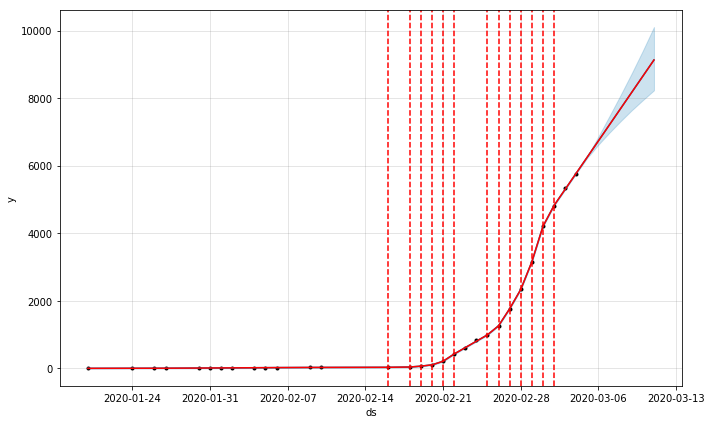

In [15]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


https://datascienceschool.net/view-notebook/8903aa20770746e78fb5b1834ab5334b/

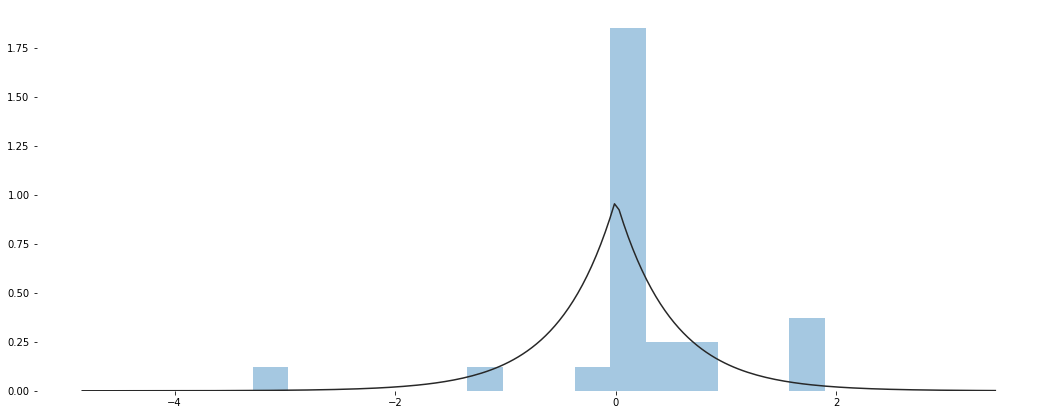

In [16]:

import seaborn as sns
import scipy as sp
sns.distplot(m.params["delta"], kde=False, fit=sp.stats.laplace)
plt.box(False)


# Prediction line + daily Confirmed_count bar graph


In [17]:
day_plus = pd.DataFrame(index=['2020-03-05','2020-03-06','2020-03-07','2020-03-08','2020-03-09','2020-03-10','2020-03-11' ]) 
daily_count = pd.concat([daily_count, day_plus])
  
accumulated_count = daily_count.cumsum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




## Blue line : 03-04 real accumulated line
after 03-04, 
## Red line : prediction line 
### bar graphs is daily Confirmed_count.

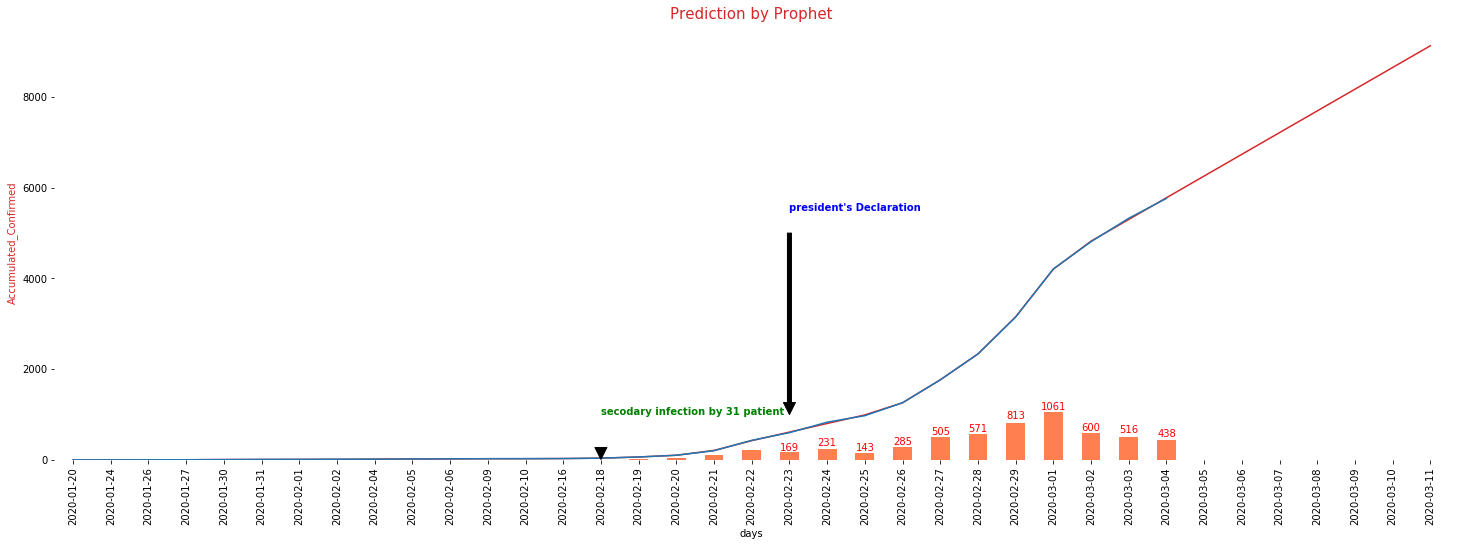

In [18]:
plt.figure(figsize=(25,8))
color = 'tab:red'
forecast.yhat.plot(color=color)
plt.ylabel('Accumulated_Confirmed', color=color)
plt.xlabel('days')
plt.title('Prediction by Prophet', color=color, fontdict ={'fontsize':15})
plt.ylim=[0,14000,2000]
plt.box(False)

accumulated_count['id'].plot()


daily_count['id'].plot(kind='bar', color=['coral'] )
plt.text(x=19, y=200, s='169',color='red', horizontalalignment='center') ;plt.text(x=20, y=300, s='231',color='red' ,horizontalalignment='center') 
plt.text(x=21, y=200, s='143',color='red',horizontalalignment='center') ;plt.text(x=22, y=330, s='285',color='red',horizontalalignment='center') 
plt.text(x=23, y=560, s='505',color='red',horizontalalignment='center') ;plt.text(x=24, y=610, s='571',color='red',horizontalalignment='center') 
plt.text(x=25, y=900, s='813',color='red',horizontalalignment='center') ;plt.text(x=26, y=1100, s='1061',color='red',horizontalalignment='center')
plt.text(x=27, y=650, s='600',color='red',horizontalalignment='center') ;plt.text(x=28, y=600, s='516',color='red',horizontalalignment='center')
plt.text(x=29, y=500, s='438',color='red',horizontalalignment='center')


plt.annotate('',xy=(14,10), xytext=(14,100), arrowprops=dict(facecolor='black'))
plt.text(x=14, y=1000, s='secodary infection by 31 patient',color='green', fontweight='bold')
plt.annotate('',xy=(19,1000), xytext=(19,5000), arrowprops=dict(facecolor='black'))
plt.text(x=19, y=5500, s='president\'s Declaration',color='blue',fontweight='bold')


plt.show()

In [19]:
daily_released_count = df_patient.groupby('released_date').id.count()
daily_released_count = pd.DataFrame(daily_released_count)
daily_plus = pd.DataFrame([3,7,47],index=['2020-03-03', '2020-03-04', '2020-03-05'], columns=['id'])
daily_released_count =pd.concat( [daily_released_count ,daily_plus] )
daily_released_count

,id
2020-02-05,1
2020-02-06,1
2020-02-09,1
2020-02-10,1
2020-02-12,3
2020-02-15,2
2020-02-17,1
2020-02-18,2
2020-02-19,4
2020-02-21,1


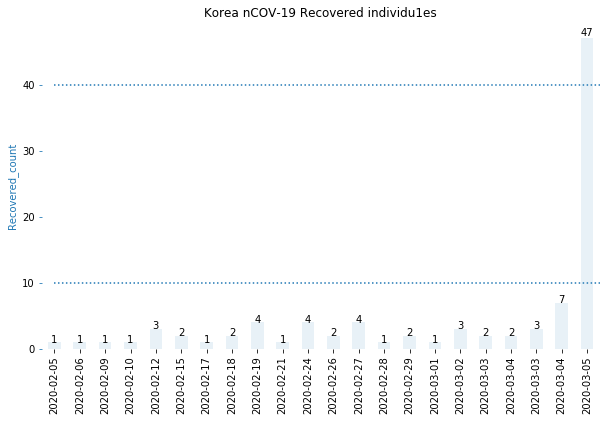

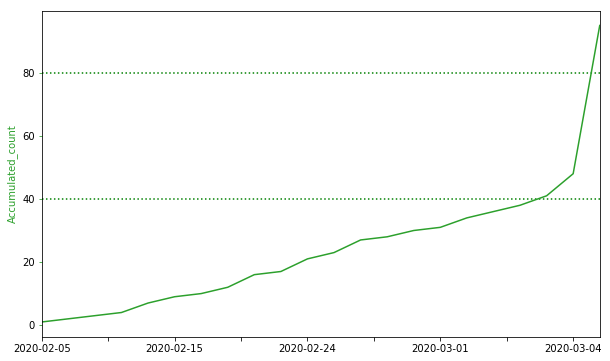

In [20]:
accumulated_released_count = daily_released_count.cumsum()
plt.rcParams['figure.figsize']=10,6
color = 'tab:blue'
ax = daily_released_count.plot(kind='bar', title = 'Korea nCOV-19 Recovered individu1es', color=color, alpha=0.1, legend=False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  ax.annotate("%.f"%(height), (left+width/2, height*1.01), ha='center') 
ax.set_ylabel('Recovered_count', color=color)
ax.tick_params(axis='y', color=color)
ax.hlines(y = 10, xmin=0, xmax=22, colors=color, linestyles='dotted')
ax.hlines(y = 40, xmin=0, xmax=22, colors=color, linestyles='dotted')
plt.box(False)


color='tab:green'
ax2= accumulated_released_count.plot( color=color, legend=False)
ax2.set_ylabel('Accumulated_count', color=color)
ax2.tick_params(axis='y', color=color)
ax2.hlines(y = 40, xmin=0, xmax=22, colors='green', linestyles='dotted')
ax2.hlines(y = 80, xmin=0, xmax=22, colors='green', linestyles='dotted')


In [21]:
 accumulated_released_count.tail()

,id
2020-03-03,36
2020-03-04,38
2020-03-03,41
2020-03-04,48
2020-03-05,95


# Accumulated Released individules count was doubled on 2020-03-05 compared 2020-03-04


In [22]:
data = df_patient[["id","sex","birth_year","confirmed_date","released_date","deceased_date","state"]]
released_base_data = data.dropna(subset=['released_date'])
released_base_data = released_base_data.drop(['deceased_date'], axis=1)
released_base_data

,id,sex,birth_year,confirmed_date,released_date,state
0,1,female,1984.0,2020-01-20,2020-02-06,released
1,2,male,1964.0,2020-01-24,2020-02-05,released
2,3,male,1966.0,2020-01-26,2020-02-12,released
3,4,male,1964.0,2020-01-27,2020-02-09,released
4,5,male,1987.0,2020-01-30,2020-03-02,released
5,6,male,1964.0,2020-01-30,2020-02-19,released
6,7,male,1991.0,2020-01-30,2020-02-15,released
7,8,female,1957.0,2020-01-31,2020-02-12,released
8,9,female,1992.0,2020-01-31,2020-02-24,released
9,10,female,1966.0,2020-01-31,2020-02-19,released


In [23]:
released_base_data.info() # 03-04 data / not updated on 03-05 / 47 peoples data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 1255
Data columns (total 6 columns):
id                38 non-null int64
sex               38 non-null object
birth_year        38 non-null float64
confirmed_date    38 non-null object
released_date     38 non-null object
state             38 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ KB


In [24]:
released_base_data.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
released_base_data.released_date = pd.to_datetime(df_patient.released_date)

# 
released_base_data['recovered_period'] = released_base_data['released_date'].dt.date - released_base_data['confirmed_date'].dt.date
released_base_data['recovered_period'] = released_base_data['recovered_period'].dt.days.astype(int)
# Age
released_base_data["age"] = released_base_data["confirmed_date"].dt.year - released_base_data["birth_year"]
released_base_data = released_base_data.drop(['birth_year'], axis=1)
# Age_class
released_base_data["age_class"] = pd.cut(released_base_data["age"], np.arange(0, 100, 10), include_lowest=True, right=False)
released_base_data


,id,sex,confirmed_date,released_date,state,recovered_period,age,age_class
0,1,female,2020-01-20,2020-02-06,released,17,36.0,"[30, 40)"
1,2,male,2020-01-24,2020-02-05,released,12,56.0,"[50, 60)"
2,3,male,2020-01-26,2020-02-12,released,17,54.0,"[50, 60)"
3,4,male,2020-01-27,2020-02-09,released,13,56.0,"[50, 60)"
4,5,male,2020-01-30,2020-03-02,released,32,33.0,"[30, 40)"
5,6,male,2020-01-30,2020-02-19,released,20,56.0,"[50, 60)"
6,7,male,2020-01-30,2020-02-15,released,16,29.0,"[20, 30)"
7,8,female,2020-01-31,2020-02-12,released,12,63.0,"[60, 70)"
8,9,female,2020-01-31,2020-02-24,released,24,28.0,"[20, 30)"
9,10,female,2020-01-31,2020-02-19,released,19,54.0,"[50, 60)"


In [25]:
boxplot = pd.DataFrame(released_base_data['recovered_period'].describe()).T
boxplot

,count,mean,std,min,25%,50%,75%,max
recovered_period,38.0,13.921053,6.771888,1.0,8.0,14.0,18.5,32.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc16eba4be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc16ebb12b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc16eba4a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc16ebb19e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc16ebb1cf8>],
 'means': []}

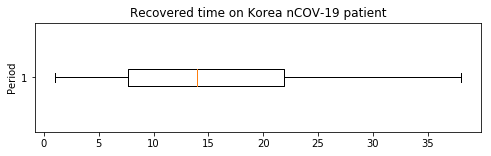

In [26]:
red_square = dict(markerfacecolor='r', marker='s')
fig, ax1 = plt.subplots(figsize=(8,2))
ax1.set_title('Recovered time on Korea nCOV-19 patient')
ax1.set_ylabel('Period')
ax1.boxplot(boxplot,  vert=False, flierprops=red_square)


# Classification by age_generation

In [27]:
released_period= released_base_data.pivot_table( index="state", columns='age_class', values='recovered_period', aggfunc='count').fillna('0')
released_period = released_period.T
released_period.reset_index(inplace=True)
released_period

state,age_class,released
0,"[10, 20)",1
1,"[20, 30)",6
2,"[30, 40)",8
3,"[40, 50)",8
4,"[50, 60)",9
5,"[60, 70)",4
6,"[70, 80)",2


In [28]:
released_period.index=['10-19','20-29','30-39','40-49','50-59','60-69', '70-']

import plotly.express as px

fig = go.Figure(data=[
    go.Bar(name='All', x=released_period.index, y=released_period.released)])


fig.show()



# Classification by sex

In [29]:
released_by_age= released_base_data.pivot_table( index="sex", columns='age_class', values='released_date', aggfunc='count').fillna('0')
released_by_age = released_by_age.T
released_by_age.reset_index(inplace=True)
released_by_age

sex,age_class,female,male
0,"[10, 20)",1,0
1,"[20, 30)",2,4
2,"[30, 40)",4,4
3,"[40, 50)",4,4
4,"[50, 60)",4,5
5,"[60, 70)",4,0
6,"[70, 80)",0,2


In [30]:
released_by_age

sex,age_class,female,male
0,"[10, 20)",1,0
1,"[20, 30)",2,4
2,"[30, 40)",4,4
3,"[40, 50)",4,4
4,"[50, 60)",4,5
5,"[60, 70)",4,0
6,"[70, 80)",0,2


In [31]:
released_by_age.index=['10-19','20-29','30-39','40-49','50-59','60-69', '70-']

import plotly.express as px

fig = go.Figure(data=[
    go.Bar(name='Female', x=released_by_age.index, y=released_by_age.female),
    go.Bar(name='Male', x=released_by_age.index, y=released_by_age.male)])

fig.update_layout(barmode='group')
fig.show()

In [32]:
Confirmed_sex = pd.DataFrame({'sex':[3617,2149], 'rate':[62.7,37.]})
Confirmed_sex = Confirmed_sex.rename(index={0:"female", 1:"male"})
Confirmed_sex

,sex,rate
female,3617,62.7
male,2149,37.0


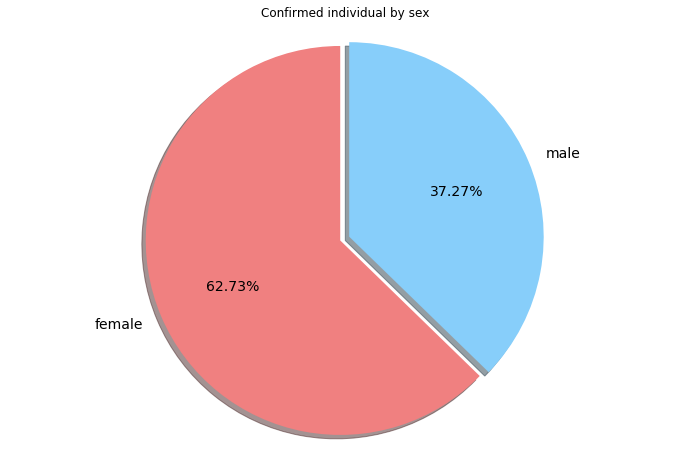

In [33]:

plt.rcParams['figure.figsize']=12,8
group_explodes = (0.05, 0) #explode 1st slice
plt.pie(Confirmed_sex['sex'], explode=group_explodes,labels=["female","male"], colors=['lightcoral', 'lightskyblue'],autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize':14})
plt.axis('equal')
plt.title('Confirmed individual by sex')
plt.show()

In [34]:
Confirmed_age = pd.DataFrame({'Confirmed':[38,257,1727,659,847,1127,699,288,124], 'rate':[0.7, 4.5, 30.0, 14.7, 19.8, 19.5, 12.1, 5.0, 2.2]})
Confirmed_age = Confirmed_age.rename(index={0:"0-9", 1:"10-19", 2:"20-29", 3:"30-39", 4:"40-49", 5:"50-59", 6:"60-69", 7:"70-79", 8:"80-"})
Confirmed_age

,Confirmed,rate
0-9,38,0.7
10-19,257,4.5
20-29,1727,30.0
30-39,659,14.7
40-49,847,19.8
50-59,1127,19.5
60-69,699,12.1
70-79,288,5.0
80-,124,2.2


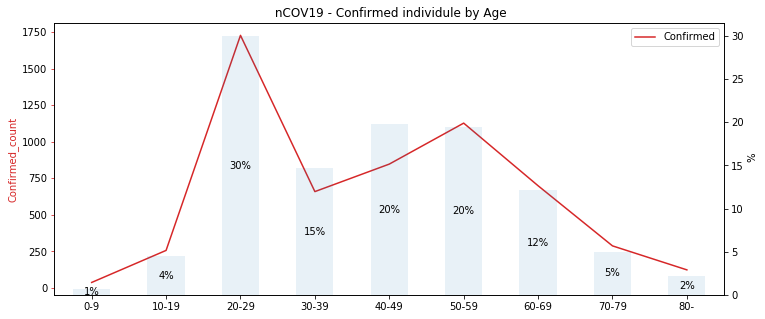

In [35]:
plt.rcParams['figure.figsize']=12,5
color = 'tab:red'
ax= Confirmed_age['Confirmed'].plot( title = " nCOV19 - Confirmed individule by Age", rot=0,color=color)
ax.set_ylabel('Confirmed_count',color=color)
ax.tick_params(axis='y',color=color)
ax.legend()

ax2 = ax.twinx()
color = 'tab:blue'
ax2 = Confirmed_age['rate'].plot(kind='bar', color=color, alpha=0.1)
ax2.set_ylabel(' %')

for p in ax2.patches: 
  left1, bottom1, width1, height1 = p.get_bbox().bounds 
  ax2.annotate("%.f%%"%(height1), xy=(left1+width1/2, bottom1+height1/2), ha='center', va='center')

plt.sca(ax)
plt.show()

In [36]:
df_patient.info() # infection_reason    146 non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766 entries, 0 to 5765
Data columns (total 14 columns):
id                  5766 non-null int64
sex                 421 non-null object
birth_year          408 non-null float64
country             5765 non-null object
region              409 non-null object
group               83 non-null object
infection_reason    146 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      50 non-null float64
confirmed_date      5765 non-null object
released_date       38 non-null object
deceased_date       23 non-null object
state               5765 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 630.8+ KB


In [37]:
pd.DataFrame(df_patient["infection_reason"].value_counts())

,infection_reason
contact with patient,75
visit to Daegu,43
visit to Wuhan,8
pilgrimage to Israel,6
visit to Thailand,2
contact with patient in Singapore,2
residence in Wuhan,2
visit to Shincheonji Church,1
visit to Cheongdo Daenam Hospital,1
visit to Vietnam,1


In [38]:
reason_dict = {   
    "contact with the patient": "contact with patient", 
    "visit to Shincheonji Church" : "contact with patient", 
    "contact with patient in Japan":  "visit to other Country",
    "contact with patient in Singapore":  "visit to other Country",
    "visit to Daegu" : "contact with patient",  
    "visit to Shincheonji Church" : "contact with patient",

    "visit to Wuhan" : "visit to China",
    " visit to China" :  "visit to China",
    "visit to China": "visit to China",
    "residence in Wuhan" : "residence in Wuhan",

    "visit to Thailand":  "visit to other Country",
    "visit to Japan": "visit to other Country",
    "visit to Italy":  "visit to other Country",
    "visit to Vietnam":  "visit to other Country",

    "contact with patient in Japan":  "visit to other Country",
    "visit to Cheongdo Daenam Hospital" :"contact with patient",
    "pilgrimage to Israel":  "visit to other Country"

}
infection_reason =pd.DataFrame(df_patient["infection_reason"].replace(reason_dict).value_counts())
infection_reason



,infection_reason
contact with patient,120
visit to other Country,14
visit to China,10
residence in Wuhan,2


In [39]:
infection_reason.reset_index(inplace=True)
infection_reason

,index,infection_reason
0,contact with patient,120
1,visit to other Country,14
2,visit to China,10
3,residence in Wuhan,2


# select data by region


In [40]:
region = pd.DataFrame(df_patient["region"].value_counts())
region.reset_index(inplace=True)
region

,index,region
0,capital area,191
1,Gyeongsangbuk-do,122
2,Daegu,48
3,Daejeon,13
4,Gwangju,11
5,Gangwon-do,5
6,filtered at airport,4
7,Jeollabuk-do,3
8,Jeollanam-do,3
9,Jeju-do,2


In [41]:
infection_reason.index=['contact with patient','visit to other Country','visit to China','residence in Wuhan']
region.index = ['capital area','Gyeongsangbuk-do','Daegu','Daejeon','Gwangju','Gangwon-do','filtered at airport','Jeollabuk-do','Jeollanam-do', 'Busan','Jeju-do','Ulsan','Chungcheongbuk-do','Chungcheongnam-do']

fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Bar(x=infection_reason.index, y=infection_reason.infection_reason,
                    marker=dict(color=infection_reason.infection_reason, coloraxis="coloraxis")),  1, 1)


fig.add_trace(go.Bar(x=region.index, y=region.region,
                    marker=dict(color=region.region, coloraxis="coloraxis")),  2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.update_layout(height=1000, showlegend=False)
fig.show()

In [42]:
region_by3_5 = pd.DataFrame({'patient':[4327,861,110,103,92,86,74], 'rate':[75.0,14.9,1.9,1.8,1.6,1.5,1.3]})
region_by3_5 = region_by3_5.rename(index={0:"Deagu", 1:"Gyeongbuk", 2:"Gyeonggi", 3:"Seoul", 4:"Busan", 5:"Chungnam", 6:"Gyeongnam"})
region_by3_5

,patient,rate
Deagu,4327,75.0
Gyeongbuk,861,14.9
Gyeonggi,110,1.9
Seoul,103,1.8
Busan,92,1.6
Chungnam,86,1.5
Gyeongnam,74,1.3


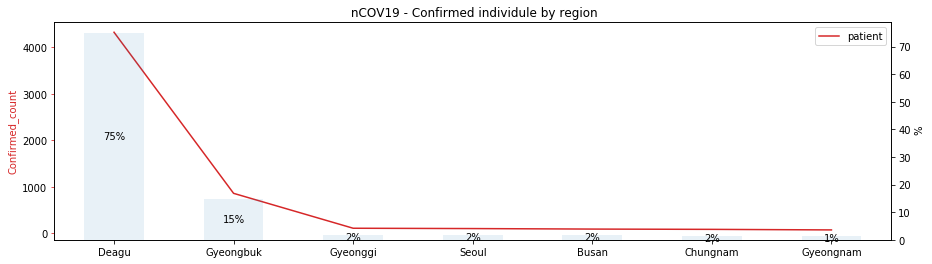

In [43]:
plt.rcParams['figure.figsize']=15,4
color = 'tab:red'
ax= region_by3_5['patient'].plot( title = " nCOV19 - Confirmed individule by region", rot=0,color=color)
ax.set_ylabel('Confirmed_count',color=color)
ax.tick_params(axis='y',color=color)
ax.legend()

ax2 = ax.twinx()
color = 'tab:blue'
ax2 = region_by3_5['rate'].plot(kind='bar', color=color, alpha=0.1)
ax2.set_ylabel(' %')

for p in ax2.patches: 
  left1, bottom1, width1, height1 = p.get_bbox().bounds 
  ax2.annotate("%.f%%"%(height1), xy=(left1+width1/2, bottom1+height1/2), ha='center', va='center')

plt.sca(ax)
plt.show()

# display pie chart

In [44]:
region_by3_5.reset_index(inplace=True)
region_by3_5.index=["Deagu","Gyeongbuk","Gyeonggi","Seoul","Busan","Chungnam","Gyeongnam"]
fig = px.pie(region_by3_5, values='rate', names='index')
fig.show()

# classification by sex

id                  5328 non-null int64

sex                 383 non-null object < 3%.. 

In [45]:
sex = pd.DataFrame(df_patient["sex"].value_counts())
sex.reset_index(inplace=True)
sex.index=['female','male']
import plotly.express as px
fig = px.pie(sex, values='sex', names='index')
fig.show()

# It doesn't matched on real data
bottom Pie graph is based on 03-05 data by CDC

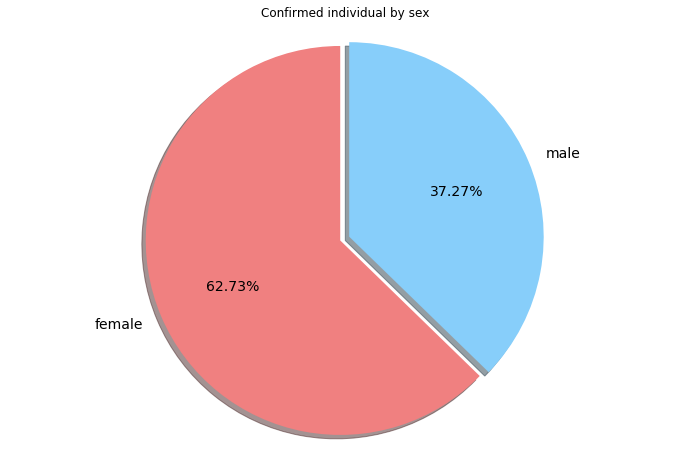

In [46]:
plt.rcParams['figure.figsize']=12,8
group_explodes = (0.05, 0) #explode 1st slice
plt.pie(Confirmed_sex['sex'], explode=group_explodes,labels=["female","male"], colors=['lightcoral', 'lightskyblue'],autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize':14})
plt.axis('equal')
plt.title('Confirmed individual by sex')
plt.show()

# state

In [47]:
state = pd.DataFrame(df_patient["state"].value_counts())
state

,state
isolated,5702
released,40
deceased,23


In [48]:
state.reset_index(inplace=True)
state.index=['isolated','released','deceased']

In [49]:
import plotly.express as px
fig = px.pie(state, values='state', names='index')
fig.show()

# from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [3]:
patient = pd.read_csv('https://github.com/mossydidar/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series.csv')
patient

HTTPError: HTTP Error 404: Not Found

In [ ]:
cols = patient.keys()
cols